In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns
import sqlite3

import chart_studio.plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 50)

In [2]:

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE  
0       0.10  
1       0.25  
2       0.10  
3       0.10  
4       0.10  


In [4]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


In [5]:
print(df.head())


   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  
0       0.10 2005-02-02  
1       0.25 2004-05-12  
2       0.10 2004-05-31  
3       0.10 2004-06-28  
4       0.10 2004-06-28  


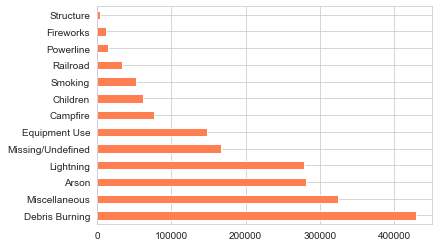

In [6]:
#causes of fire
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()


In [7]:
full_df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
print(full_df.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  \
0                  0511     Plumas National Forest         

In [8]:

print(full_df.columns)

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')


In [9]:
full_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [10]:

full_df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [11]:
fire_dash_df = pd.read_sql_query('''SELECT  
                                   SOURCE_REPORTING_UNIT, SOURCE_REPORTING_UNIT_NAME, LOCAL_FIRE_REPORT_ID,
                                   FIRE_NAME, FIRE_YEAR, DISCOVERY_DATE, DISCOVERY_DOY, DISCOVERY_TIME, 
                                   STAT_CAUSE_CODE, STAT_CAUSE_DESCR, CONT_DATE, CONT_DOY, CONT_TIME, 
                                   FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, STATE, COUNTY
                                   FROM Fires''', conn)
fire_dash_df.head()


,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,0511,Plumas National Forest,1,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,CA,63
1,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,CA,61
2,0503,Eldorado National Forest,27,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,CA,17
3,0503,Eldorado National Forest,43,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,CA,3
4,0503,Eldorado National Forest,44,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,CA,3


In [12]:
# Write a SQL query to display the causes of wildfires
cause_df = pd.read_sql_query('''
                            SELECT STAT_CAUSE_DESCR, STAT_CAUSE_CODE, STATE, DISCOVERY_DATE, CONT_DATE, FIRE_SIZE
                            FROM Fires
                            WHERE STAT_CAUSE_DESCR != 'Miscellaneous'
                            AND STAT_CAUSE_DESCR != 'Missing/Undefined'
                            ORDER BY STATE DESC
                            ''', conn)
cause_df.head()

,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,STATE,DISCOVERY_DATE,CONT_DATE,FIRE_SIZE
0,Lightning,1.0,WY,2453527.5,2453527.5,0.25
1,Lightning,1.0,WY,2453546.5,2453547.5,0.10
2,Campfire,4.0,WY,2453519.5,2453519.5,0.10
3,Lightning,1.0,WY,2453542.5,2453543.5,0.10
4,Campfire,4.0,WY,2453561.5,2453561.5,0.10


In [13]:

# Set a new variable for the purpose of displaying the value counts of 'STAT_CAUSE_DESCR'
cause_vis = cause_df['STAT_CAUSE_DESCR'].value_counts()

Text(0.5, 0, 'Count')

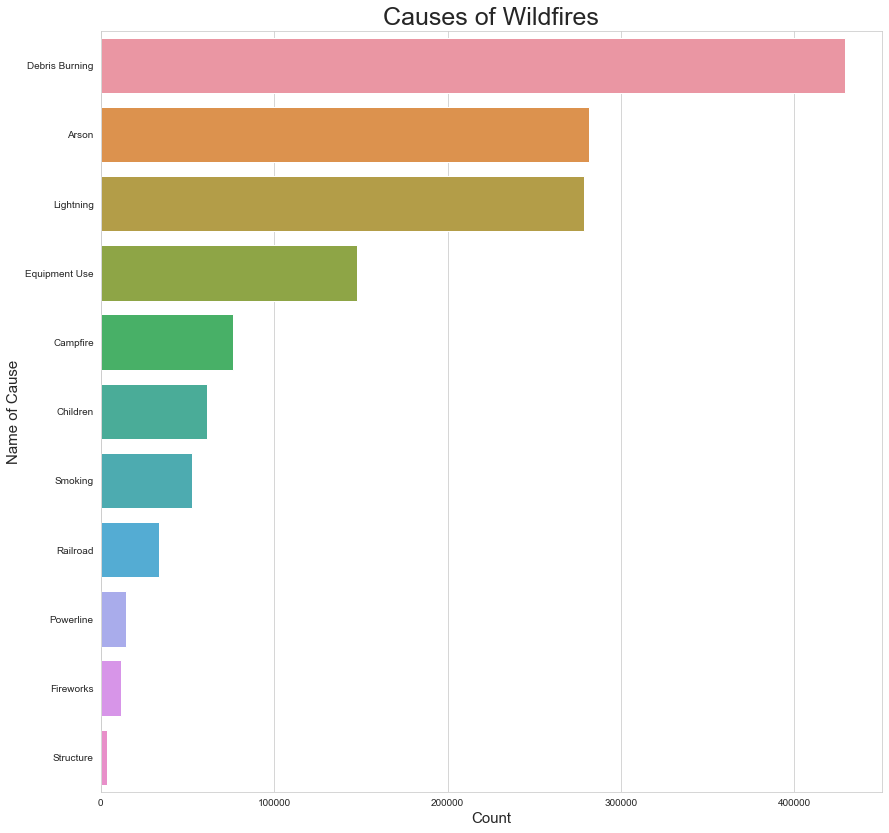

In [14]:
# Plot the causes of wildfires
plt.figure(figsize=(14,14))
sns.barplot(y=cause_vis.index, x=cause_vis)
plt.title('Causes of Wildfires', fontsize=25)
plt.ylabel('Name of Cause', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [15]:

# Write a SQL query for the correlation dataframe
corr_df = pd.read_sql_query('''
                            SELECT FIRE_NAME, FIRE_YEAR, DISCOVERY_DATE, STAT_CAUSE_DESCR, 
                            CONT_DATE, FIRE_SIZE, LATITUDE, LONGITUDE, STATE 
                            FROM Fires
                            ORDER BY FIRE_SIZE DESC''', conn)
corr_df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,INOWAK,1997,2450624.5,Lightning,2450700.5,606945.0,61.982700,-157.085700,AK
1,LONG DRAW,2012,2456116.5,Lightning,2456138.5,558198.3,42.391894,-117.893687,OR
2,WALLOW,2011,2455710.5,Campfire,2455754.5,538049.0,33.606111,-109.449722,AZ
3,BOUNDARY,2004,2453169.5,Lightning,2453278.5,537627.0,65.266300,-146.885800,AK
4,MINTO FLATS SOUTH,2009,2455003.5,Lightning,2455085.5,517078.0,64.746700,-149.504700,AK


In [16]:
# FEAUTRE ENGINEERING: Create a new column that identifies the time it took for the fire to become contained
corr_df['CONT_TIME'] = corr_df['CONT_DATE'] - corr_df['DISCOVERY_DATE']

In [17]:
# Create a new datetime column for each DISCOVERY_DATE and CONT_DATE
corr_df['FIRE_DISC_DATE'] = pd.to_datetime(corr_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
corr_df['FIRE_CONT_DATE'] = pd.to_datetime(corr_df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [18]:
# Display the new df
corr_df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_TIME,FIRE_DISC_DATE,FIRE_CONT_DATE
0,INOWAK,1997,2450624.5,Lightning,2450700.5,606945.0,61.982700,-157.085700,AK,76.0,1997-06-25,1997-09-09
1,LONG DRAW,2012,2456116.5,Lightning,2456138.5,558198.3,42.391894,-117.893687,OR,22.0,2012-07-08,2012-07-30
2,WALLOW,2011,2455710.5,Campfire,2455754.5,538049.0,33.606111,-109.449722,AZ,44.0,2011-05-29,2011-07-12
3,BOUNDARY,2004,2453169.5,Lightning,2453278.5,537627.0,65.266300,-146.885800,AK,109.0,2004-06-13,2004-09-30
4,MINTO FLATS SOUTH,2009,2455003.5,Lightning,2455085.5,517078.0,64.746700,-149.504700,AK,82.0,2009-06-21,2009-09-11


In [19]:
# Drop the FIRE_YEAR and CONT_DATE columns
corr_df = corr_df.drop('FIRE_YEAR', axis = 1)
corr_df = corr_df.drop('CONT_DATE', axis = 1)


In [20]:
# Display the new df
corr_df.head()

,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_TIME,FIRE_DISC_DATE,FIRE_CONT_DATE
0,INOWAK,2450624.5,Lightning,606945.0,61.982700,-157.085700,AK,76.0,1997-06-25,1997-09-09
1,LONG DRAW,2456116.5,Lightning,558198.3,42.391894,-117.893687,OR,22.0,2012-07-08,2012-07-30
2,WALLOW,2455710.5,Campfire,538049.0,33.606111,-109.449722,AZ,44.0,2011-05-29,2011-07-12
3,BOUNDARY,2453169.5,Lightning,537627.0,65.266300,-146.885800,AK,109.0,2004-06-13,2004-09-30
4,MINTO FLATS SOUTH,2455003.5,Lightning,517078.0,64.746700,-149.504700,AK,82.0,2009-06-21,2009-09-11


<AxesSubplot:>

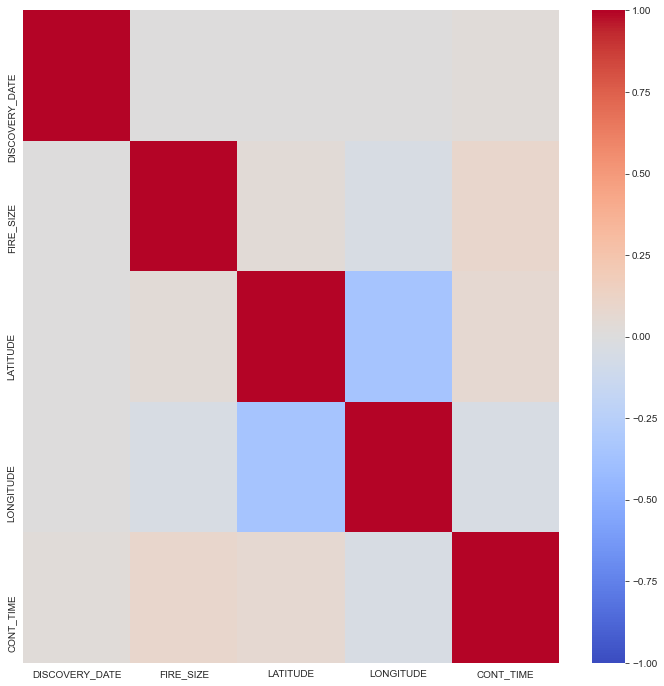

In [21]:
# Plot the new correlation matrix based upon the created dataframe 'corr_df'
plt.figure(figsize=(12,12))
sns.heatmap(corr_df.corr(), 
            cmap='coolwarm', 
            vmin=-1, vmax=1)

In [22]:
# Display the current dataframe
corr_df.head()

,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_TIME,FIRE_DISC_DATE,FIRE_CONT_DATE
0,INOWAK,2450624.5,Lightning,606945.0,61.982700,-157.085700,AK,76.0,1997-06-25,1997-09-09
1,LONG DRAW,2456116.5,Lightning,558198.3,42.391894,-117.893687,OR,22.0,2012-07-08,2012-07-30
2,WALLOW,2455710.5,Campfire,538049.0,33.606111,-109.449722,AZ,44.0,2011-05-29,2011-07-12
3,BOUNDARY,2453169.5,Lightning,537627.0,65.266300,-146.885800,AK,109.0,2004-06-13,2004-09-30
4,MINTO FLATS SOUTH,2455003.5,Lightning,517078.0,64.746700,-149.504700,AK,82.0,2009-06-21,2009-09-11


In [23]:
# Drop unnecessary columns that are redundant for the model
mlcause_df = corr_df.drop('FIRE_NAME', axis=1)
mlcause_df = mlcause_df.drop('FIRE_DISC_DATE', axis=1)
mlcause_df = mlcause_df.drop('FIRE_CONT_DATE', axis=1)

In [24]:
# Display the new dataframe
mlcause_df.head()

,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_TIME
0,2450624.5,Lightning,606945.0,61.982700,-157.085700,AK,76.0
1,2456116.5,Lightning,558198.3,42.391894,-117.893687,OR,22.0
2,2455710.5,Campfire,538049.0,33.606111,-109.449722,AZ,44.0
3,2453169.5,Lightning,537627.0,65.266300,-146.885800,AK,109.0
4,2455003.5,Lightning,517078.0,64.746700,-149.504700,AK,82.0


In [25]:

# Identify null values
mlcause_df.isna().any()

DISCOVERY_DATE      False
STAT_CAUSE_DESCR    False
FIRE_SIZE           False
LATITUDE            False
LONGITUDE           False
STATE               False
CONT_TIME            True
dtype: bool

In [26]:
# Replace the null values with a '1'
# These null values are a result of the containment day being the same as discovery day 
# (fires that began and ended in the same day)
mlcause_df.CONT_TIME = mlcause_df.CONT_TIME.fillna(value=1.0)

In [27]:
mlcause_df.head()

,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_TIME
0,2450624.5,Lightning,606945.0,61.982700,-157.085700,AK,76.0
1,2456116.5,Lightning,558198.3,42.391894,-117.893687,OR,22.0
2,2455710.5,Campfire,538049.0,33.606111,-109.449722,AZ,44.0
3,2453169.5,Lightning,537627.0,65.266300,-146.885800,AK,109.0
4,2455003.5,Lightning,517078.0,64.746700,-149.504700,AK,82.0


In [28]:
le = LabelEncoder()
mlcause_df['STATE'] = le.fit_transform(mlcause_df['STATE'])

mlcause_df = mlcause_df.dropna()
print(mlcause_df.head())

   DISCOVERY_DATE STAT_CAUSE_DESCR  FIRE_SIZE   LATITUDE   LONGITUDE  STATE  \
0       2450624.5        Lightning   606945.0  61.982700 -157.085700      0   
1       2456116.5        Lightning   558198.3  42.391894 -117.893687     37   
2       2455710.5         Campfire   538049.0  33.606111 -109.449722      3   
3       2453169.5        Lightning   537627.0  65.266300 -146.885800      0   
4       2455003.5        Lightning   517078.0  64.746700 -149.504700      0   

   CONT_TIME  
0       76.0  
1       22.0  
2       44.0  
3      109.0  
4       82.0  


In [29]:
# Create new dataframes with and without 'STAT_CAUSE_DESCR'
X = mlcause_df.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = mlcause_df['STAT_CAUSE_DESCR'].values

In [30]:

# Perform a train/test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% for testing, 70% for training

In [31]:
# Initialize RandomForestClassifier from SkLearn
rfc_model = RandomForestClassifier(n_estimators=50)

In [32]:
# Fit the model on the X_train and y_train data
rfc_model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50)

In [33]:
(rfc_model.score(X_test,y_test))

0.5803027617258127

In [34]:
mlsize_df = pd.read_sql_query('''
                            SELECT FIRE_YEAR, DISCOVERY_DATE, STAT_CAUSE_DESCR, 
                            CONT_DATE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, STATE 
                            FROM Fires
                            ORDER BY FIRE_SIZE DESC''', conn)

In [35]:
mlsize_df.head()


,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1997,2450624.5,Lightning,2450700.5,G,61.982700,-157.085700,AK
1,2012,2456116.5,Lightning,2456138.5,G,42.391894,-117.893687,OR
2,2011,2455710.5,Campfire,2455754.5,G,33.606111,-109.449722,AZ
3,2004,2453169.5,Lightning,2453278.5,G,65.266300,-146.885800,AK
4,2009,2455003.5,Lightning,2455085.5,G,64.746700,-149.504700,AK


In [36]:

# FEAUTRE ENGINEERING: Create a new column that identifies the time it took for the fire to become contained
mlsize_df['CONT_TIME'] = mlsize_df['CONT_DATE'] - mlsize_df['DISCOVERY_DATE']
# Create a new datetime column for each DISCOVERY_DATE and CONT_DATE
mlsize_df['FIRE_DISC_DATE'] = pd.to_datetime(mlsize_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
mlsize_df['FIRE_CONT_DATE'] = pd.to_datetime(mlsize_df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

# FEAUTRE ENGINEERING: Create a new column for discovery month
mlsize_df['DISC_MONTH'] = pd.DatetimeIndex(mlsize_df['FIRE_DISC_DATE']).month

# FEAUTRE ENGINEERING: Create a new column for discovery day of week
mlsize_df['DISC_DAY_OF_WEEK'] = mlsize_df['FIRE_DISC_DATE'].dt.day_name

mlsize_df.head()

,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CONT_TIME,FIRE_DISC_DATE,FIRE_CONT_DATE,DISC_MONTH,DISC_DAY_OF_WEEK
0,1997,2450624.5,Lightning,2450700.5,G,61.982700,-157.085700,AK,76.0,1997-06-25,1997-09-09,6,<bound method PandasDelegate._add_delegate_acc...
1,2012,2456116.5,Lightning,2456138.5,G,42.391894,-117.893687,OR,22.0,2012-07-08,2012-07-30,7,<bound method PandasDelegate._add_delegate_acc...
2,2011,2455710.5,Campfire,2455754.5,G,33.606111,-109.449722,AZ,44.0,2011-05-29,2011-07-12,5,<bound method PandasDelegate._add_delegate_acc...
3,2004,2453169.5,Lightning,2453278.5,G,65.266300,-146.885800,AK,109.0,2004-06-13,2004-09-30,6,<bound method PandasDelegate._add_delegate_acc...
4,2009,2455003.5,Lightning,2455085.5,G,64.746700,-149.504700,AK,82.0,2009-06-21,2009-09-11,6,<bound method PandasDelegate._add_delegate_acc...


In [37]:
# Drop the FIRE_DISC_DATE, FIRE_CONT_DATE, and CONT_DATE columns
mlsize_df = mlsize_df.drop('CONT_DATE', axis=1)
mlsize_df = mlsize_df.drop('FIRE_DISC_DATE', axis=1)
mlsize_df = mlsize_df.drop('FIRE_CONT_DATE', axis=1)

In [38]:
# FEAUTRE ENGINEERING: Label encode the columns for numerical calculations
le = LabelEncoder()
mlsize_df['STAT_CAUSE_DESCR'] = le.fit_transform(mlsize_df['STAT_CAUSE_DESCR'])
mlsize_df['STATE'] = le.fit_transform(mlsize_df['STATE'])
mlsize_df['DISC_DAY_OF_WEEK'] = le.fit_transform(mlsize_df['DISC_DAY_OF_WEEK'])
mlsize_df['DISC_MONTH'] = le.fit_transform(mlsize_df['DISC_MONTH'])
mlsize_df['FIRE_SIZE_CLASS'] = le.fit_transform(mlsize_df['FIRE_SIZE_CLASS'])

In [39]:
mlsize_df.head()

,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,CONT_TIME,DISC_MONTH,DISC_DAY_OF_WEEK
0,1997,2450624.5,6,6,61.982700,-157.085700,0,76.0,5,0
1,2012,2456116.5,6,6,42.391894,-117.893687,37,22.0,6,0
2,2011,2455710.5,1,6,33.606111,-109.449722,3,44.0,4,0
3,2004,2453169.5,6,6,65.266300,-146.885800,0,109.0,5,0
4,2009,2455003.5,6,6,64.746700,-149.504700,0,82.0,5,0


In [40]:

# Replace the null values with a '1'
# These null values are a result of the containment day being the same as discovery day 
# (fires that began and ended in the same day)
mlsize_df.CONT_TIME = mlsize_df.CONT_TIME.fillna(value=1.0)

# Create new dataframes with and without 'FIRE_SIZE_CLASS'
X = mlsize_df.drop(['FIRE_SIZE_CLASS'], axis=1).values
y = mlsize_df['FIRE_SIZE_CLASS'].values

In [41]:
# Perform a train/test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% for testing, 70% for training

In [42]:
# Improved Random Forest
# FEAUTURE ENGINEERING: Drop all rows where STATE != 4
# Drop CONT_TIME
mlsize_df = mlsize_df.loc[mlsize_df['STATE'] == 4]
mlsize_df = mlsize_df.drop('CONT_TIME', axis = 1)
mlsize_df.head()

,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISC_MONTH,DISC_DAY_OF_WEEK
19,2012,2456151.5,6,6,40.615300,-120.115300,4,7,0
29,2003,2452937.5,1,6,32.985556,-116.727500,4,9,0
36,2013,2456521.5,7,6,37.860556,-120.083056,4,7,0
43,2007,2454285.5,4,6,34.779167,-120.090000,4,6,0
66,2007,2454394.5,7,6,33.074444,-116.711111,4,9,0


In [43]:
# Create new dataframes with and without 'FIRE_SIZE_CLASS'
X = mlsize_df.drop(['FIRE_SIZE_CLASS'], axis=1).values
y = mlsize_df['FIRE_SIZE_CLASS'].values

In [44]:
# Perform a train/test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% for testing, 70% for training

In [45]:
# Initialize RandomForestClassifier from SkLearn
rfc_model = RandomForestClassifier(n_estimators=50)

In [46]:
# Fit the model on the X_train and y_train data
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [47]:
# Print the model score based upon the random forest classifier
print(rfc_model.score(X_test,y_test))

0.6025674843928602


In [48]:
# Write a function to set labels where 0 = small fire, 1 = large fire
def set_label(siz):
    sizes = 0
    small = [1, 2, 3, 4]
    large = [5, 6]
    if siz in small:
        size = 0
    else:
        size = 1
    return size

In [49]:
mlsize_df['FIRE_SIZE_LABEL'] = mlsize_df['FIRE_SIZE_CLASS'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
mlsize_df.head()

,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISC_MONTH,DISC_DAY_OF_WEEK,FIRE_SIZE_LABEL
19,2012,2456151.5,6,6,40.615300,-120.115300,4,7,0,1
29,2003,2452937.5,1,6,32.985556,-116.727500,4,9,0,1
36,2013,2456521.5,7,6,37.860556,-120.083056,4,7,0,1
43,2007,2454285.5,4,6,34.779167,-120.090000,4,6,0,1
66,2007,2454394.5,7,6,33.074444,-116.711111,4,9,0,1


In [50]:
# Count the values in FIRE_SIZE_LABEL column
mlsize_df.FIRE_SIZE_LABEL.value_counts()

1    99459
0    90091
Name: FIRE_SIZE_LABEL, dtype: int64

In [51]:
# Drop FIRE_SIZE_CLASS column
mlsize_df = mlsize_df.drop('FIRE_SIZE_CLASS', axis=1)

In [52]:
# Create new dataframes with and without 'FIRE_SIZE_CLASS'
X = mlsize_df.drop(['FIRE_SIZE_LABEL'], axis=1).values
y = mlsize_df['FIRE_SIZE_LABEL'].values

In [53]:
# Perform a train/test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #30% for testing, 70% for training

In [54]:
# Initialize RandomForestClassifier from SkLearn
rfc_model = RandomForestClassifier(n_estimators=50)

In [55]:
# Fit the model on the X_train and y_train data
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [56]:
# Print the model score based upon the random forest classifier
print(rfc_model.score(X_test,y_test))

0.655060230370175
